<a href="https://colab.research.google.com/github/guillaumebrethes/Oct_cda_bankmarketing/blob/main/Guillaume_Brethes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The initial step in my capstone project during my Data Analyst training involves studying and analyzing data. This project serves as the cornerstone, showcasing my skills and commitment to excellence.**

In [1]:
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import calendar
import matplotlib.pyplot as plt

##### acces to colab / VSC , Enable or disable comments below.
from google.colab import drive
drive.mount('/content/drive/') # available to connect with drive


Mounted at /content/drive/


In [2]:
##### acces to colab / VSC , Enable or disable comments below.
df = pd.read_csv("/content/drive/MyDrive/DataScientest /Oct_cda_bankmarketing/Guillaume/bank.csv")

##### acces to colab / VSC , Enable or disable comments below.
# df = pd.read_csv("bank.csv")


print("shape => ", df.shape)
df.head()


shape =>  (11162, 17)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


| Colonne    | Description                                                              | Qualitative / Quantitative |
|------------|--------------------------------------------------------------------------|----------------------------|
| age        | Âge du client                                                            |Quantitative - catégorielles|
| job        | Type d'emploi du client                                                  |Qualitative - continues     |
| marital    | Statut marital du client                                                 |Qualitative - continues     |
| education  | Niveau d'éducation du client                                             |Qualitative - continues     |
| default    | Si le client a un crédit par défaut                                      |Qualitative - continues     |
| balance    | Solde sur le compte                                                      |Quantitative - catégorielles|
| housing    | Si le client a un prêt immobilier                                        |Qualitative - continues     |
| loan       | Si le client a un prêt personnel                                         |Qualitative - continues     |
| contact    | Type de communication pour contacter le client                           |Qualitative - continues     |
| day        | Jour du mois pour le dernier contact                                     |Qualitative - continues     |
| month      | Mois de la dernière communication                                        |Qualitative - continues     |
| duration   | Durée de la dernière communication en secondes                           |Quantitative - catégorielles|
| campaign   | Nombre de contacts effectués lors de cette campagne                      |Quantitative - catégorielles|
| pdays      | Nombre de jours écoulés depuis le dernier contact de la dernière campagne|Quantitative - catégorielles|
| previous   | Nombre de contacts effectués avant cette campagne                        |Quantitative - catégorielles|
| poutcome   | Résultat de la dernière campagne de marketing précédente                 |Qualitative - continues     |
| deposit    | Si le client a souscrit à un dépôt à terme                               |Qualitative - continues     |


In [3]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [5]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [6]:
print(df.duplicated().sum())

0


### Print unique values for each columns and their %

In [7]:
# print unique value with loop for each columns

for col in df.columns:
  unique_value = df[col].unique()
  print(f"> : {col} ==> : {unique_value}")
  print(df[col].value_counts(normalize= True).round(2) * 100 )
  print(f'- {df[col].dtypes} -')
  print('---------------------------')

> : age ==> : [59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
31    4.0
32    4.0
34    4.0
33    4.0
35    4.0
     ... 
92    0.0
93    0.0
88    0.0
95    0.0
89    0.0
Name: age, Length: 76, dtype: float64
- int64 -
---------------------------
> : job ==> : ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
management       23.0
blue-collar      17.0
technician       16.0
admin.           12.0
services          8.0
retired           7.0
self-employed     4.0
student           3.0
unemployed        3.0
entrepreneur      3.0
housemaid         2.0
unknown           1.0
Name: job, dtype: float64
- object -
---------------------------
> : marital ==> : ['married' 'single' 'divorced']
married     57.0
single 

### mode

In [8]:
# mode

# mode_education = df["education"].replace(to_replace= "unknown", value= df['education'].mode()[0], inplace= True)
# print(df["education"].value_counts())
# print("---------------")

# mode_job = df["job"].replace(to_replace= "unknown", value= df['job'].mode()[0], inplace= True)
# print(df["job"].value_counts())
# print("---------------")

### Boxplot and Distribution for each numeric colums


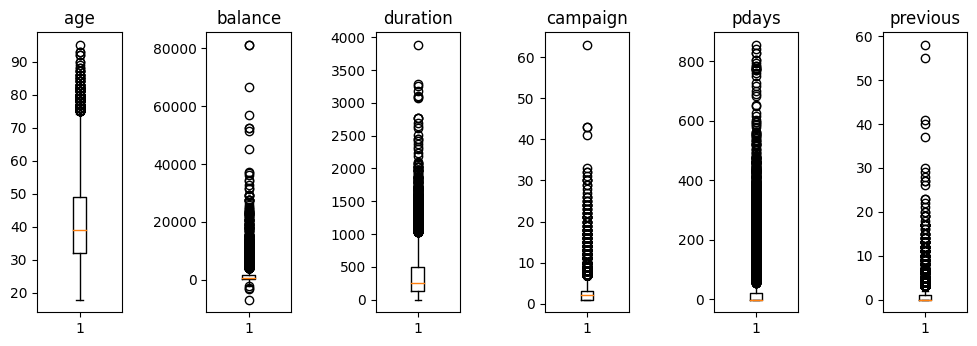

In [9]:
fig = plt.figure(figsize=(12, 8))

# Columns list
columns_to_show = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

for i, column in enumerate(columns_to_show, 1):
    plt.subplot(2, 6, i)
    plt.boxplot([df[column]])
    plt.title(column)

## Without loop ...
# plt.subplot(2, 4, 1)
# plt.boxplot([df.age])
# plt.title('Age')

fig.subplots_adjust(wspace=1)
plt.show()


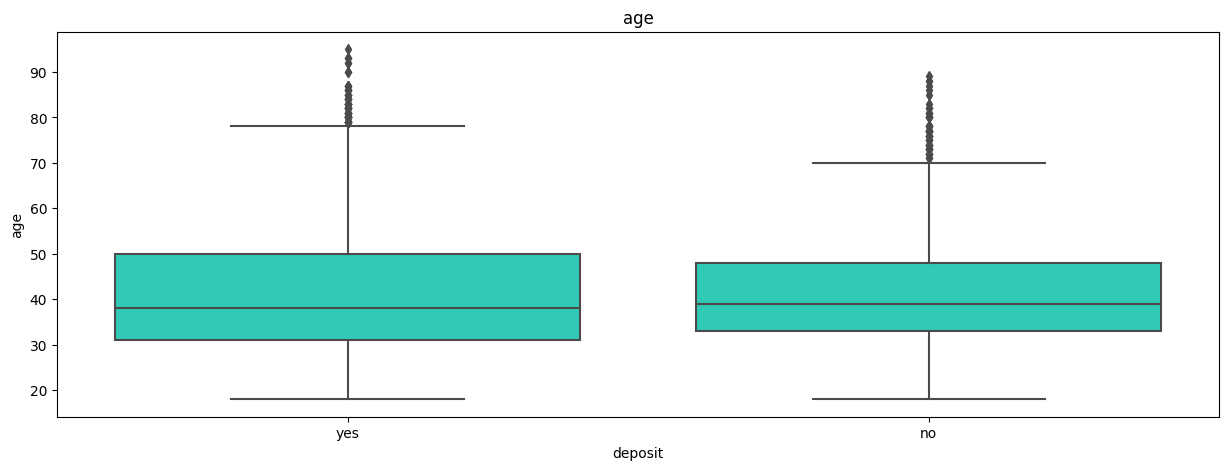

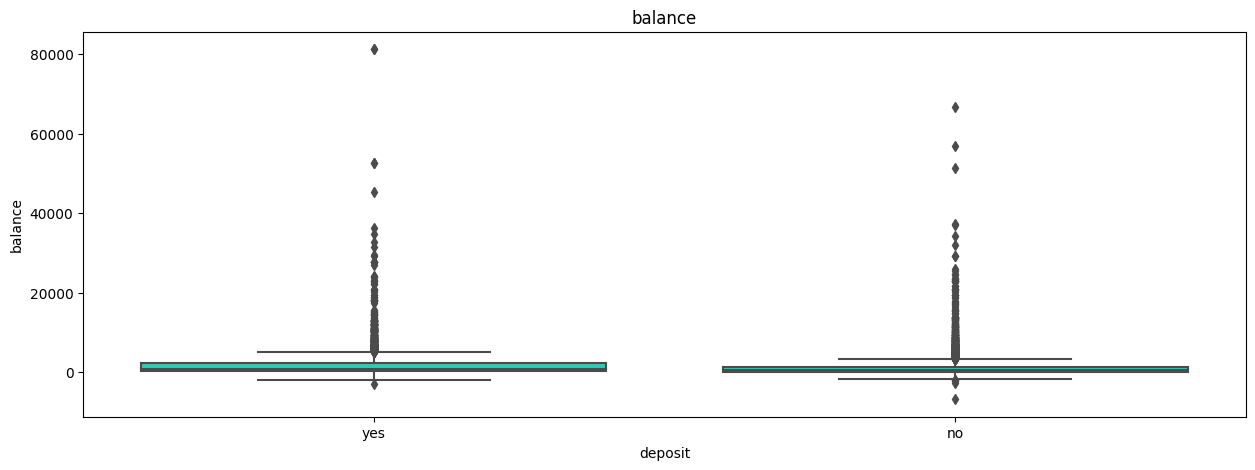

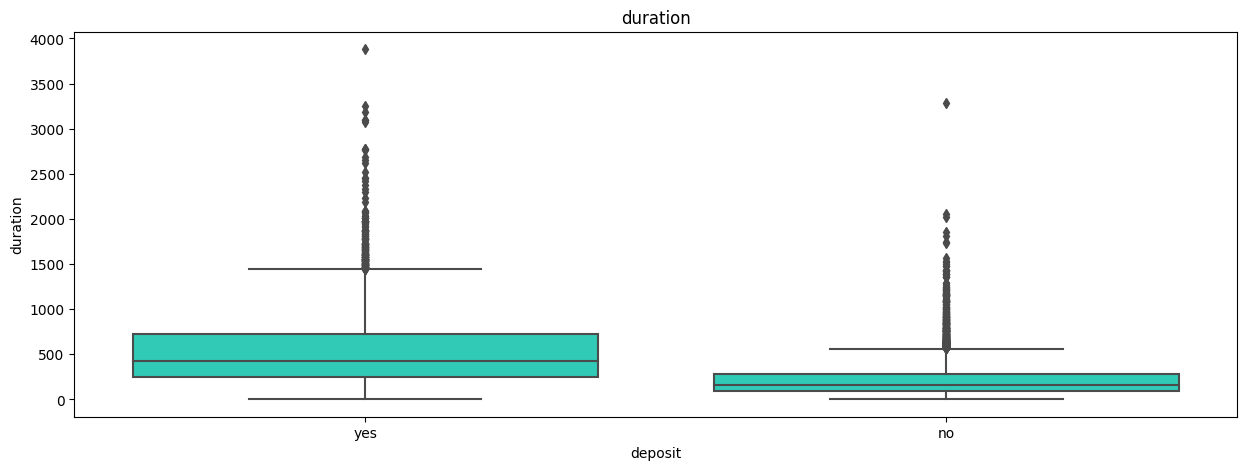

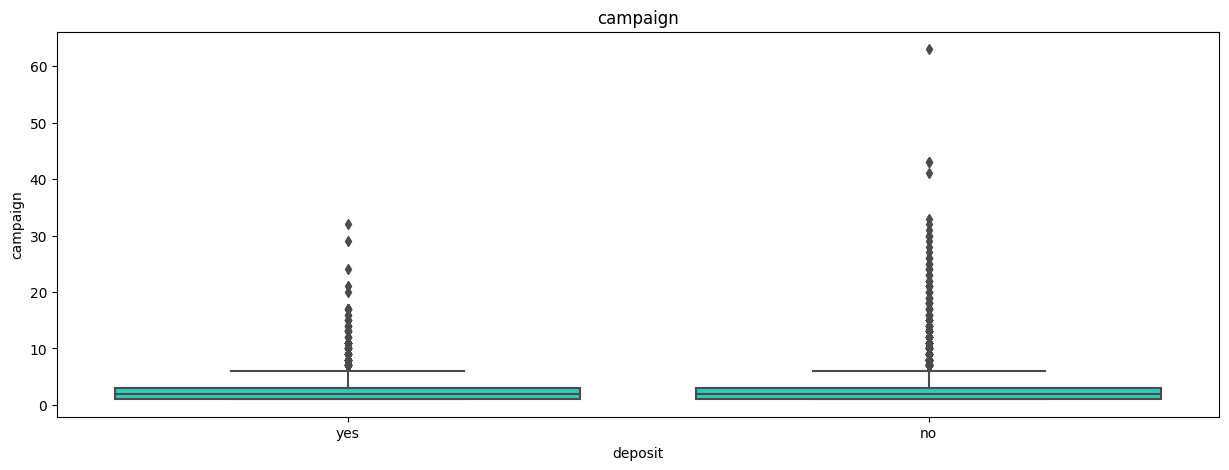

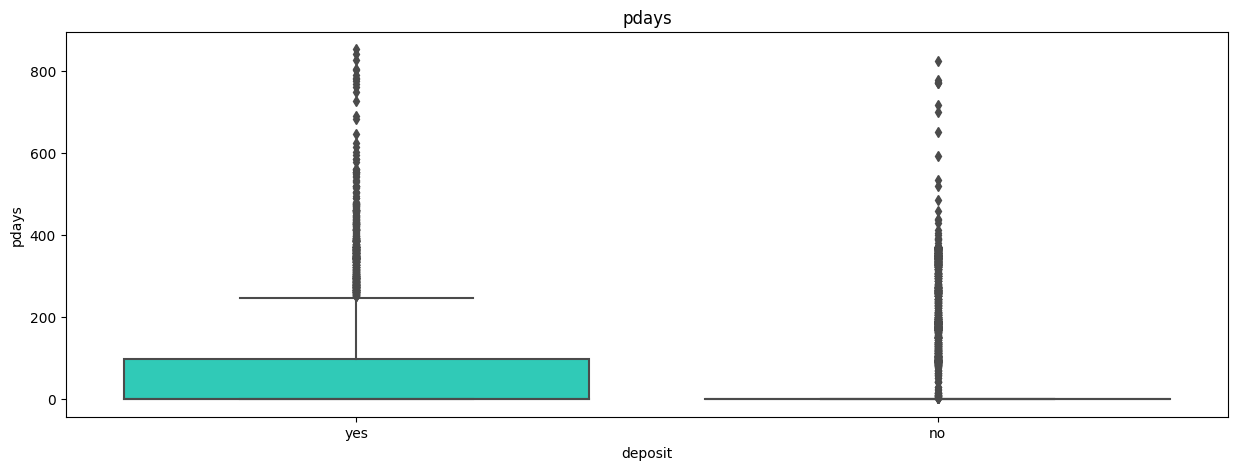

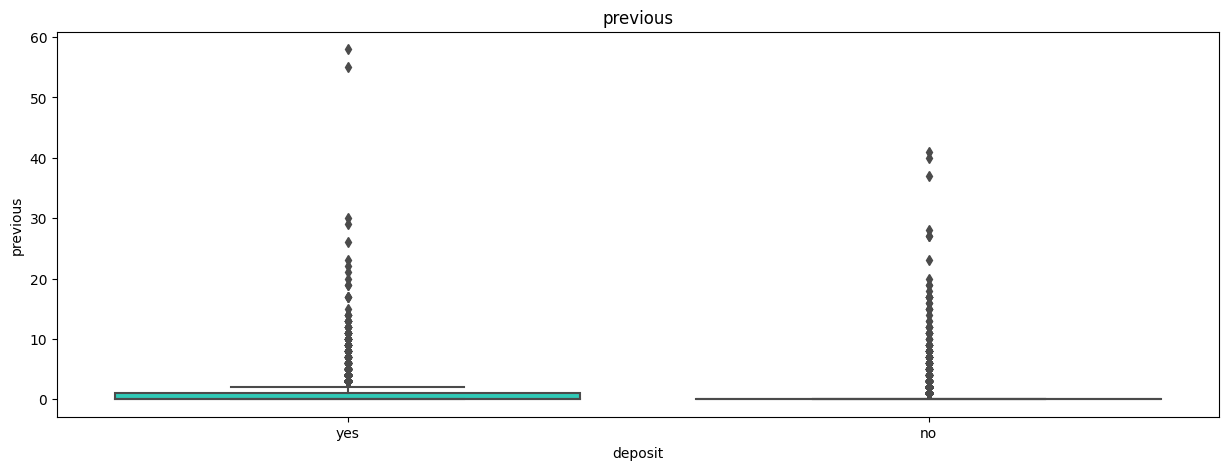

In [10]:
columns_to_show = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']


for i in columns_to_show:
    fig, axs = plt.subplots(1, 1, figsize=(15, 5))
    sns.boxplot(y=df[i], x=df['deposit'], ax=axs, color='#16E4CA')
    plt.title(i)

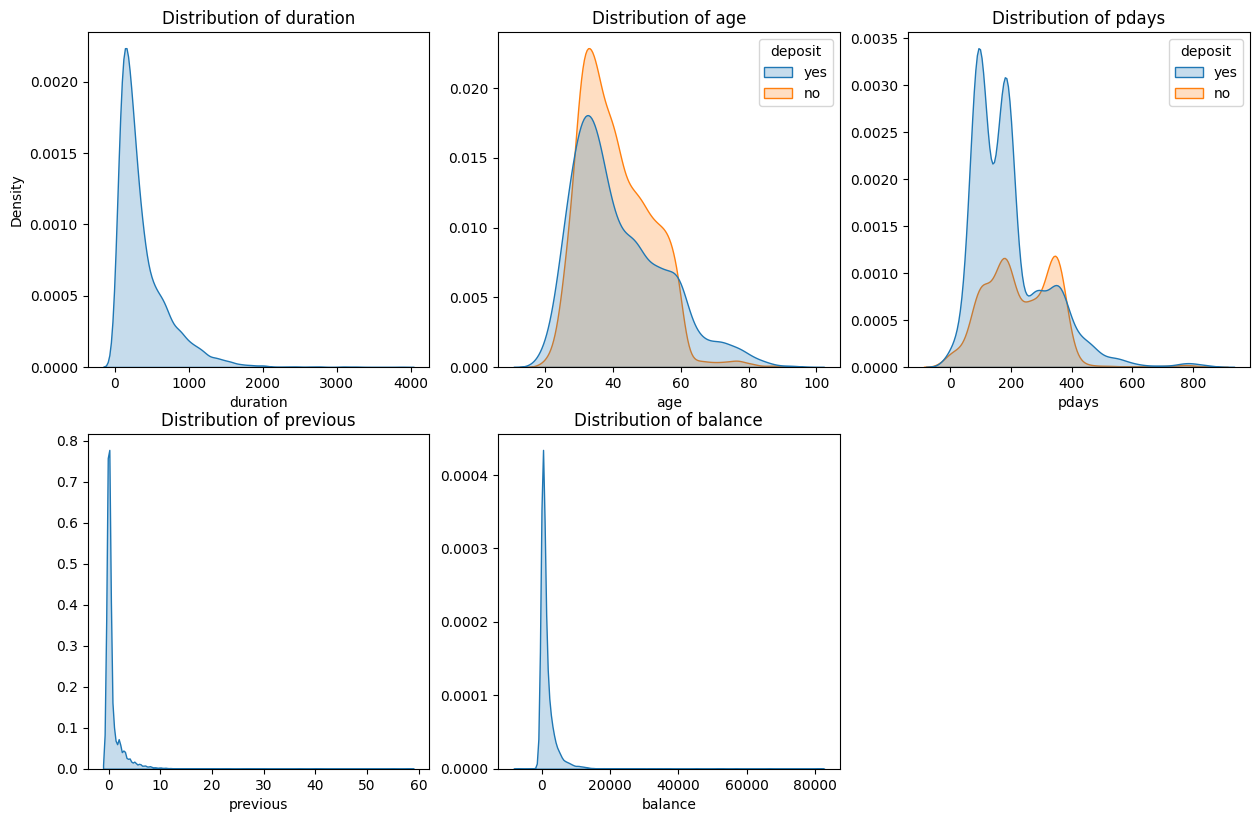

In [11]:
fig = plt.figure(figsize= (15, 20))

#1 ### Duration
plt.subplot(4, 3, 1)
sns.kdeplot(data=df, x='duration', fill=True)
plt.xlabel('duration')
plt.ylabel('Density')
plt.title('Distribution of duration')

#2 ### Age
plt.subplot(4, 3, 2)
sns.kdeplot(data=df, x='age', fill=True, hue= "deposit")
plt.xlabel('age')
plt.ylabel('')
plt.title('Distribution of age')

#3 ### pdays
x = df[df["pdays"] > 0]
# print(x["pdays"].value_counts().sort_values())

plt.subplot(4, 3, 3)
sns.kdeplot(data=x, x= "pdays", fill=True, hue= "deposit")
plt.xlabel('pdays')
plt.ylabel('')
plt.title('Distribution of pdays')

#4 ### Previous
plt.subplot(4, 3, 4)
sns.kdeplot(data=df, x='previous', fill=True)
plt.xlabel('previous')
plt.ylabel('')
plt.title('Distribution of previous')

#5 ### Balance
plt.subplot(4, 3, 5)
sns.kdeplot(data=df, x='balance', fill=True)
plt.xlabel('balance')
plt.ylabel('')
plt.title('Distribution of balance')

plt.show()
fig.subplots_adjust(wspace= 1, hspace= 0.8)


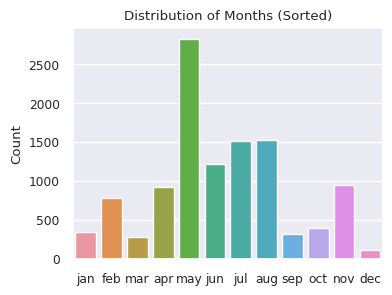

In [12]:
order_of_months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

df_months_sorted = df.sort_values(by='month', key=lambda x: pd.Categorical(x, categories= order_of_months, ordered=True))

# Utiliser countplot pour afficher l'histogramme
plt.figure(figsize=(4, 3))
sns.set(font_scale=0.8)
plt.title('Distribution of Months (Sorted)')
sns.countplot(data=df_months_sorted, x='month', order=order_of_months)
plt.xlabel('')
plt.ylabel('Count')
plt.show()

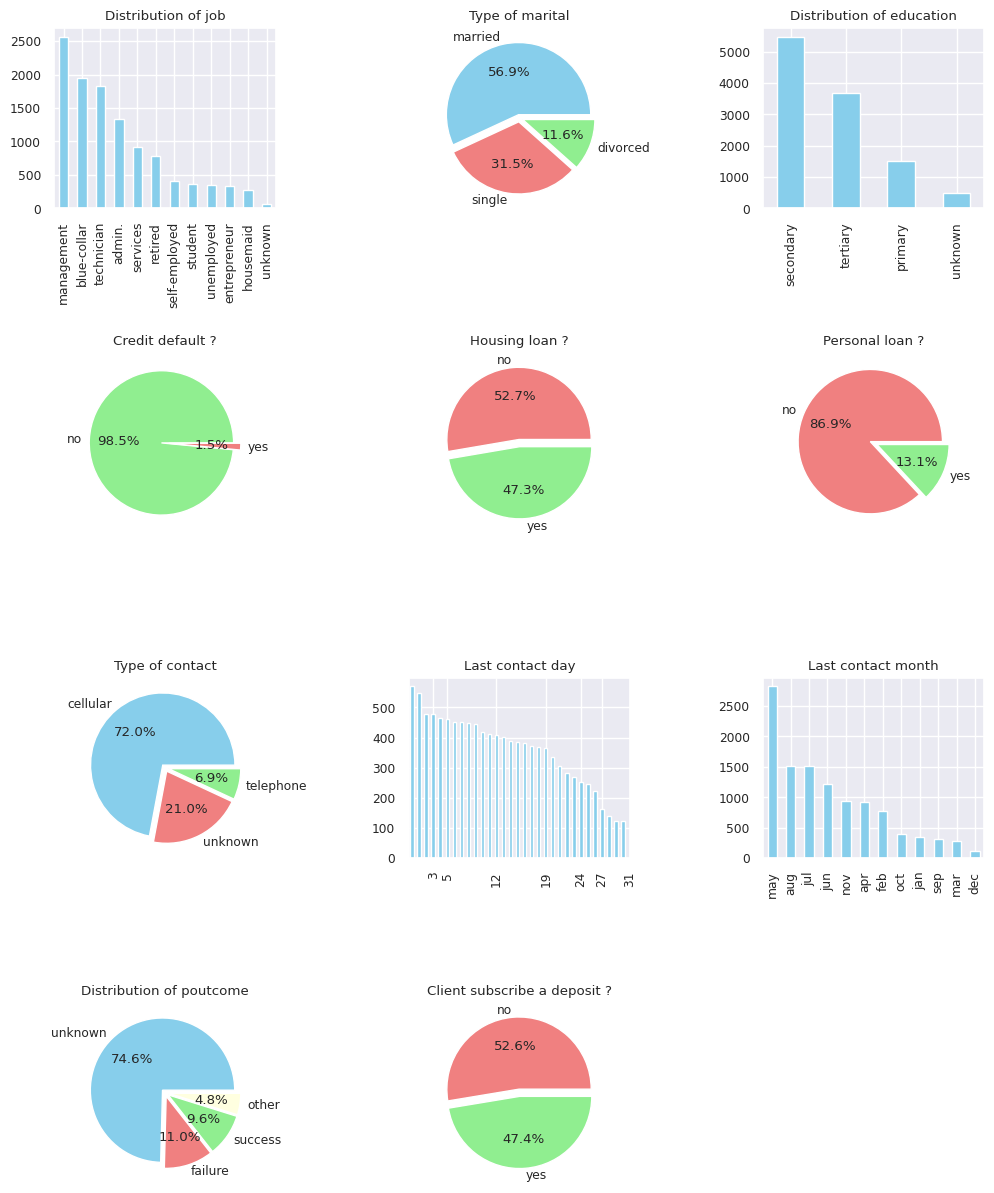

In [13]:
fig = plt.figure(figsize= (12, 15))

#1 ### Job
plt.subplot(4, 3, 1)
plt.title('Distribution of job')
df['job'].value_counts().plot(
        kind= 'bar',
        color='skyblue')
plt.ylabel('')
plt.xlabel('')

#2 ### marital
plt.subplot(4, 3, 2)
plt.title('Type of marital')
df['marital'].value_counts().plot(
        kind= 'pie',
        colors= ['skyblue', 'lightcoral', 'lightgreen'],
        autopct='%1.1f%%',
        explode= (0.05, 0.05, 0.05))
plt.ylabel('')
plt.xlabel('')

#3 ### education
plt.subplot(4, 3, 3)
plt.title('Distribution of education')
df['education'].value_counts().plot(
        kind= 'bar',
        color='skyblue')
plt.ylabel('')
plt.xlabel('')

#4 ### default
plt.subplot(4, 3, 4)
plt.title('Credit default ?')
df['default'].value_counts().plot(
        kind= 'pie',
        colors= ['lightgreen', 'lightcoral'],
        autopct='%1.1f%%',
        explode= (0.05, 0.05))
plt.ylabel('')

#5 ### housing
plt.subplot(4, 3, 5)
plt.title('Housing loan ?')
df['housing'].value_counts().plot(
        kind= 'pie',
        colors= ['lightcoral', 'lightgreen'],
        autopct='%1.1f%%',
        explode= (0.05, 0.05))
plt.ylabel('')

#6 ### loan
plt.subplot(4, 3, 6)
plt.title('Personal loan ?')
df['loan'].value_counts().plot(
        kind= 'pie',
        colors= ['lightcoral', 'lightgreen'],
        autopct='%1.1f%%',
        explode= (0.05, 0.05))
plt.ylabel('')

""" #7 ### contact kind = 'bar'
plt.subplot(4, 3, 7)
plt.title('Distribution of contact type')
df['contact'].value_counts(normalize= True).plot(
        kind= 'bar',
        color='skyblue')
plt.ylabel('')
plt.xlabel('') """

#7 ### contact kind = 'pie'
plt.subplot(4, 3, 7)
plt.title('Type of contact')
df['contact'].value_counts().plot(
        kind= 'pie',
        colors= ['skyblue', 'lightcoral', 'lightgreen'],
        autopct='%1.1f%%',
        explode= (0.05, 0.05, 0.05))
plt.ylabel('')
plt.xlabel('')

#8 ### day
plt.subplot(4, 3, 8)
plt.title('Last contact day')
df['day'].value_counts().plot(
        kind= 'bar',
        color='skyblue')
plt.ylabel('')
plt.xlabel('')
plt.xticks(df['day'].unique()[::5], df['day'].unique()[::5])

#9 ### month
# class in asd position ?
plt.subplot(4, 3, 9)
plt.title('Last contact month')
df['month'].value_counts().plot(
        kind= 'bar',
        color='skyblue')
plt.ylabel('')
plt.xlabel('')

""" #10 ### poutcome
plt.subplot(4, 3, 10)
plt.title('Distribution of poutcome')
df['poutcome'].value_counts().plot(
        kind= 'bar',
        color='skyblue')
plt.xlabel('') """

#10 ### poutcome
plt.subplot(4, 3, 10)
plt.title('Distribution of poutcome')
df['poutcome'].value_counts().plot(
        kind= 'pie',
        colors= ['skyblue', 'lightcoral', 'lightgreen', 'lightyellow'],
        autopct='%1.1f%%',
        explode= (0.05, 0.05, 0.05, 0.05))
plt.ylabel('')
plt.xlabel('')

#11 ### deposit
plt.subplot(4, 3, 11)
plt.title('Client subscribe a deposit ?')
df['deposit'].value_counts().plot(
        kind= 'pie',
        colors= ['lightcoral', 'lightgreen'],
        autopct='%1.1f%%',
        explode= (0.05, 0.05))
plt.ylabel('')
plt.xlabel('')

#12 ### month_sorted
""" order_of_months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

df_months_sorted = df.sort_values(by='month', key=lambda x: pd.Categorical(x, categories= order_of_months, ordered=True))

# Utiliser countplot pour afficher l'histogramme
plt.subplot(4, 3, 12)
sns.set(font_scale=0.8)
plt.title('Distribution of Months (Sorted)')
sns.countplot(data=df_months_sorted, x='month', order=order_of_months)
plt.xlabel('')Ò
plt.ylabel('Count')
plt.show() """


fig.subplots_adjust(wspace= 0.6, hspace= 0.8)
plt.show()


In [14]:
# to do : "sns.jointplot" between 'housing' and 'deposit'

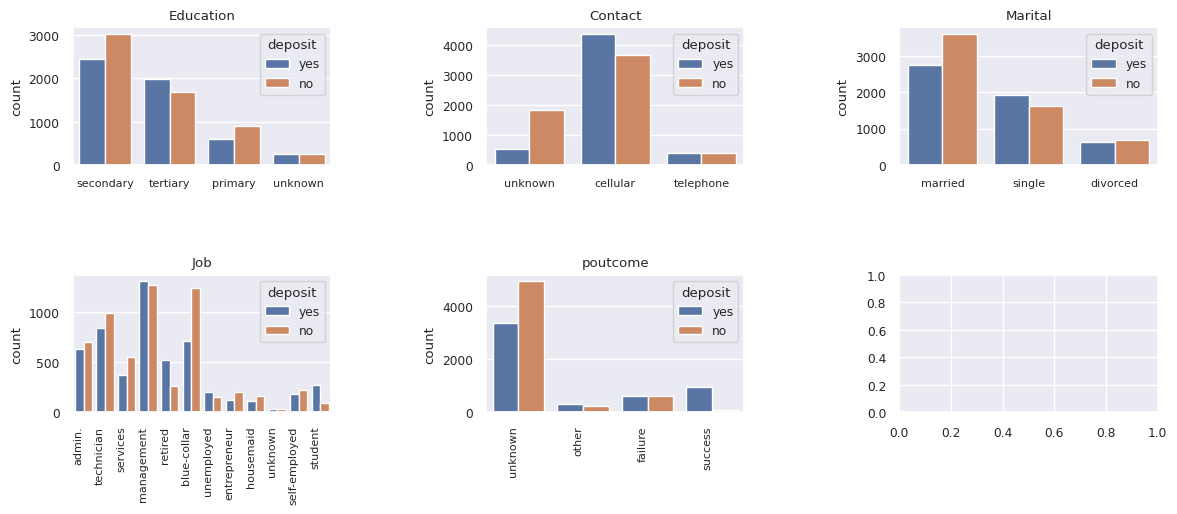

In [15]:
#### education
fig, axes = plt.subplots(2, 3, figsize=(14, 5))

# 1
sns.countplot(x= "education", hue="deposit", data=df, ax=axes[0,0])
axes[0,0].set_title('Education')
axes[0,0].set_xlabel('')
axes[0,0].tick_params(axis= 'x', labelsize= 8)

# 2
sns.countplot(x= "contact", hue="deposit", data=df, ax=axes[0,1])
axes[0,1].set_title('Contact')
axes[0,1].set_xlabel('')
axes[0,1].tick_params(axis= 'x', labelsize= 8)

# 3
sns.countplot(x= "marital", hue="deposit", data=df, ax=axes[0,2])
axes[0,2].set_title('Marital')
axes[0,2].set_xlabel('')
axes[0,2].tick_params(axis= 'x', labelsize= 8)

# 4
sns.countplot(x= "job", hue="deposit", data=df, ax=axes[1,0])
axes[1,0].set_title('Job')
axes[1,0].set_xlabel('')
axes[1,0].tick_params(axis= 'x', labelsize= 8)
axes[1,0].set_xticklabels(axes[1,0].get_xticklabels(), rotation=90, ha="right")

# 5
sns.countplot(x= "poutcome", hue="deposit", data=df, ax=axes[1,1])
axes[1,1].set_title('poutcome')
axes[1,1].set_xlabel('')
axes[1,1].tick_params(axis= 'x', labelsize= 8)
axes[1,1].set_xticklabels(axes[1,1].get_xticklabels(), rotation=90, ha="right")


# sns.countplot(x= "job", hue="deposit", data=df, ax=axes[1])
# axes[1].set_title('Job vs. Deposit', )
# axes[1].set_xlabel('')
# axes[1].tick_params(axis= 'x', labelsize= 8)
# axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, ha="right")

fig.subplots_adjust(wspace= 0.6, hspace= 0.8)
plt.show()

In [16]:
df["contact"].value_counts(normalize= True) * 100
# aller voir ce que je trouve dedans ? souscrit ou pas ? a comparé sur une base de  données totales

cellular     72.048020
unknown      21.017739
telephone     6.934241
Name: contact, dtype: float64

In [17]:
df["pdays"].value_counts()

# sns.displot(df['pdays'].unique(), kde= True, rug= True, bins= 3, color= 'blue', height= 3)
# plt.show()


-1      8324
 92      106
 182      89
 91       84
 181      81
        ... 
 437       1
 728       1
 518       1
 828       1
 118       1
Name: pdays, Length: 472, dtype: int64

In [18]:
df["previous"].value_counts(normalize= True) * 100
# 74 % without contact before this campaign

0     74.574449
1      7.946605
2      6.208565
3      3.897151
4      2.185988
5      1.478230
6      1.048199
7      0.689841
8      0.537538
9      0.304605
10     0.268769
11     0.206056
12     0.143343
13     0.098549
17     0.098549
14     0.053754
15     0.044795
19     0.035836
16     0.017918
20     0.017918
27     0.017918
23     0.017918
40     0.008959
41     0.008959
28     0.008959
18     0.008959
58     0.008959
55     0.008959
26     0.008959
21     0.008959
22     0.008959
30     0.008959
29     0.008959
37     0.008959
Name: previous, dtype: float64

In [19]:
df["duration"].value_counts().sort_values()


1812     1
1512     1
1469     1
1417     1
1635     1
        ..
150     37
119     37
158     37
161     38
97      39
Name: duration, Length: 1428, dtype: int64

In [20]:
# Loof to found deposit = yes in columns with values= "unknown"
# cols_unknown = ["education", "contact", "job", "poutcome"]
cols_unknown = ["education", "contact", "job"]


for col in cols_unknown:
    unknown_values = df[df[col] == "unknown"]
    unknown_values_with_deposit =  df[(df[col] == "unknown") & (df["deposit"] == "yes" )]
    ratio = (unknown_values_with_deposit.shape[0] * 100 / unknown_values.shape[0])
    print(f"For unknown of {col} there are", round(ratio), '% a deposit = YES' )

For unknown of education there are 51 % a deposit = YES
For unknown of contact there are 23 % a deposit = YES
For unknown of job there are 49 % a deposit = YES


In [21]:
# Loof to found deposit = yes in columns with values= "unknown"
cols_unknown = ["previous"]

for col in cols_unknown:
    unknown_values = df[df[col] == 0]
    unknown_values_with_deposit =  df[(df[col] == 0) & (df["deposit"] == "yes" )]
    ratio = (unknown_values_with_deposit.shape[0] * 100 / unknown_values.shape[0])
    print(f"For '0' sign in {col} there are", round(ratio), '% a deposit = YES' )

For '0' sign in previous there are 41 % a deposit = YES


In [22]:

poutcome_deposit_now_yes =  df.loc[df["deposit"] == "yes", "poutcome"]
print(poutcome_deposit_now_yes.value_counts(normalize= True))

#

unknown    0.640197
success    0.184912
failure    0.116846
other      0.058045
Name: poutcome, dtype: float64


### test (khi-deux) pday and previous

In [23]:
# pday - poutcome - previous
from scipy.stats import chi2_contingency


## test (khi-deux) pday and previous
# Ho = independence
# H1 = dependence
# if p-val < 0.05  => H1 : OK

crosstab_pday_previous = pd.crosstab(df["pdays"], df["previous"])

resultats_chi2 = chi2_contingency(crosstab_pday_previous)
statistique = resultats_chi2[0]
p_valeur = resultats_chi2[1]
print("pdays -> previous")
print("Value of test   > ", statistique, "\n"
      "Value p-valeur  > ", p_valeur, "\n")

## ## test (khi-deux) deposit and housing
crosstab_deposit_housing = pd.crosstab(df["deposit"], df["housing"])

resultats_chi2 = chi2_contingency(crosstab_deposit_housing)
statistique = resultats_chi2[0]
p_valeur = resultats_chi2[1]
print("deposit -> housing")
print("Value of test   > ", statistique, "\n"
      "Value p-valeur  > ", p_valeur, "\n")

## ## test (khi-deux) deposit and loan
crosstab_deposit_loan = pd.crosstab(df["deposit"], df["loan"])

resultats_chi2 = chi2_contingency(crosstab_deposit_loan)
statistique = resultats_chi2[0]
p_valeur = resultats_chi2[1]
print("deposit -> loan")
print("Value of test   > ", statistique, "\n"
      "Value p-valeur  > ", p_valeur, "\n")

## ## test (khi-deux) deposit and loan
crosstab_deposit_default = pd.crosstab(df["default"], df["deposit"])

resultats_chi2 = chi2_contingency(crosstab_deposit_default)
statistique = resultats_chi2[0]
p_valeur = resultats_chi2[1]
print("deposit -> default")
print("Value of test   > ", statistique, "\n"
      "Value p-valeur  > ", p_valeur, "\n")


pdays -> previous
Value of test   >  96951.86327023983 
Value p-valeur  >  0.0 

deposit -> housing
Value of test   >  463.1892407533161 
Value p-valeur  >  9.724394114495535e-103 

deposit -> loan
Value of test   >  135.83217051738103 
Value p-valeur  >  2.171286879630289e-31 

deposit -> default
Value of test   >  17.808573693473093 
Value p-valeur  >  2.4428001791928345e-05 



### khi2 loop on df.columns

In [24]:
from scipy.stats import chi2_contingency

for col in df.columns:
    crosstab = pd.crosstab(df["deposit"], df[col])
    resultats = chi2_contingency(crosstab)
    statistique = resultats[0]
    p_valeur = resultats[1]
    print(f"deposit -> {col}")
    print("Value of test   > ", statistique, "\n"
          "Value p-valeur  > ", p_valeur, "\n")


deposit -> age
Value of test   >  581.5816599589007 
Value p-valeur  >  2.1711069702818387e-79 

deposit -> job
Value of test   >  378.0752558664989 
Value p-valeur  >  2.741689587081072e-74 

deposit -> marital
Value of test   >  109.58335610012479 
Value p-valeur  >  1.600576988089358e-24 

deposit -> education
Value of test   >  122.77008967211441 
Value p-valeur  >  1.9534186354212855e-26 

deposit -> default
Value of test   >  17.808573693473097 
Value p-valeur  >  2.442800179192829e-05 

deposit -> balance
Value of test   >  4565.609063544128 
Value p-valeur  >  1.0495593296697213e-16 

deposit -> housing
Value of test   >  463.1892407533161 
Value p-valeur  >  9.724394114495535e-103 

deposit -> loan
Value of test   >  135.83217051738103 
Value p-valeur  >  2.171286879630289e-31 

deposit -> contact
Value of test   >  736.6866796046972 
Value p-valeur  >  1.0728032438445805e-160 

deposit -> day
Value of test   >  363.8956910878613 
Value p-valeur  >  5.181588008775809e-59 

dep

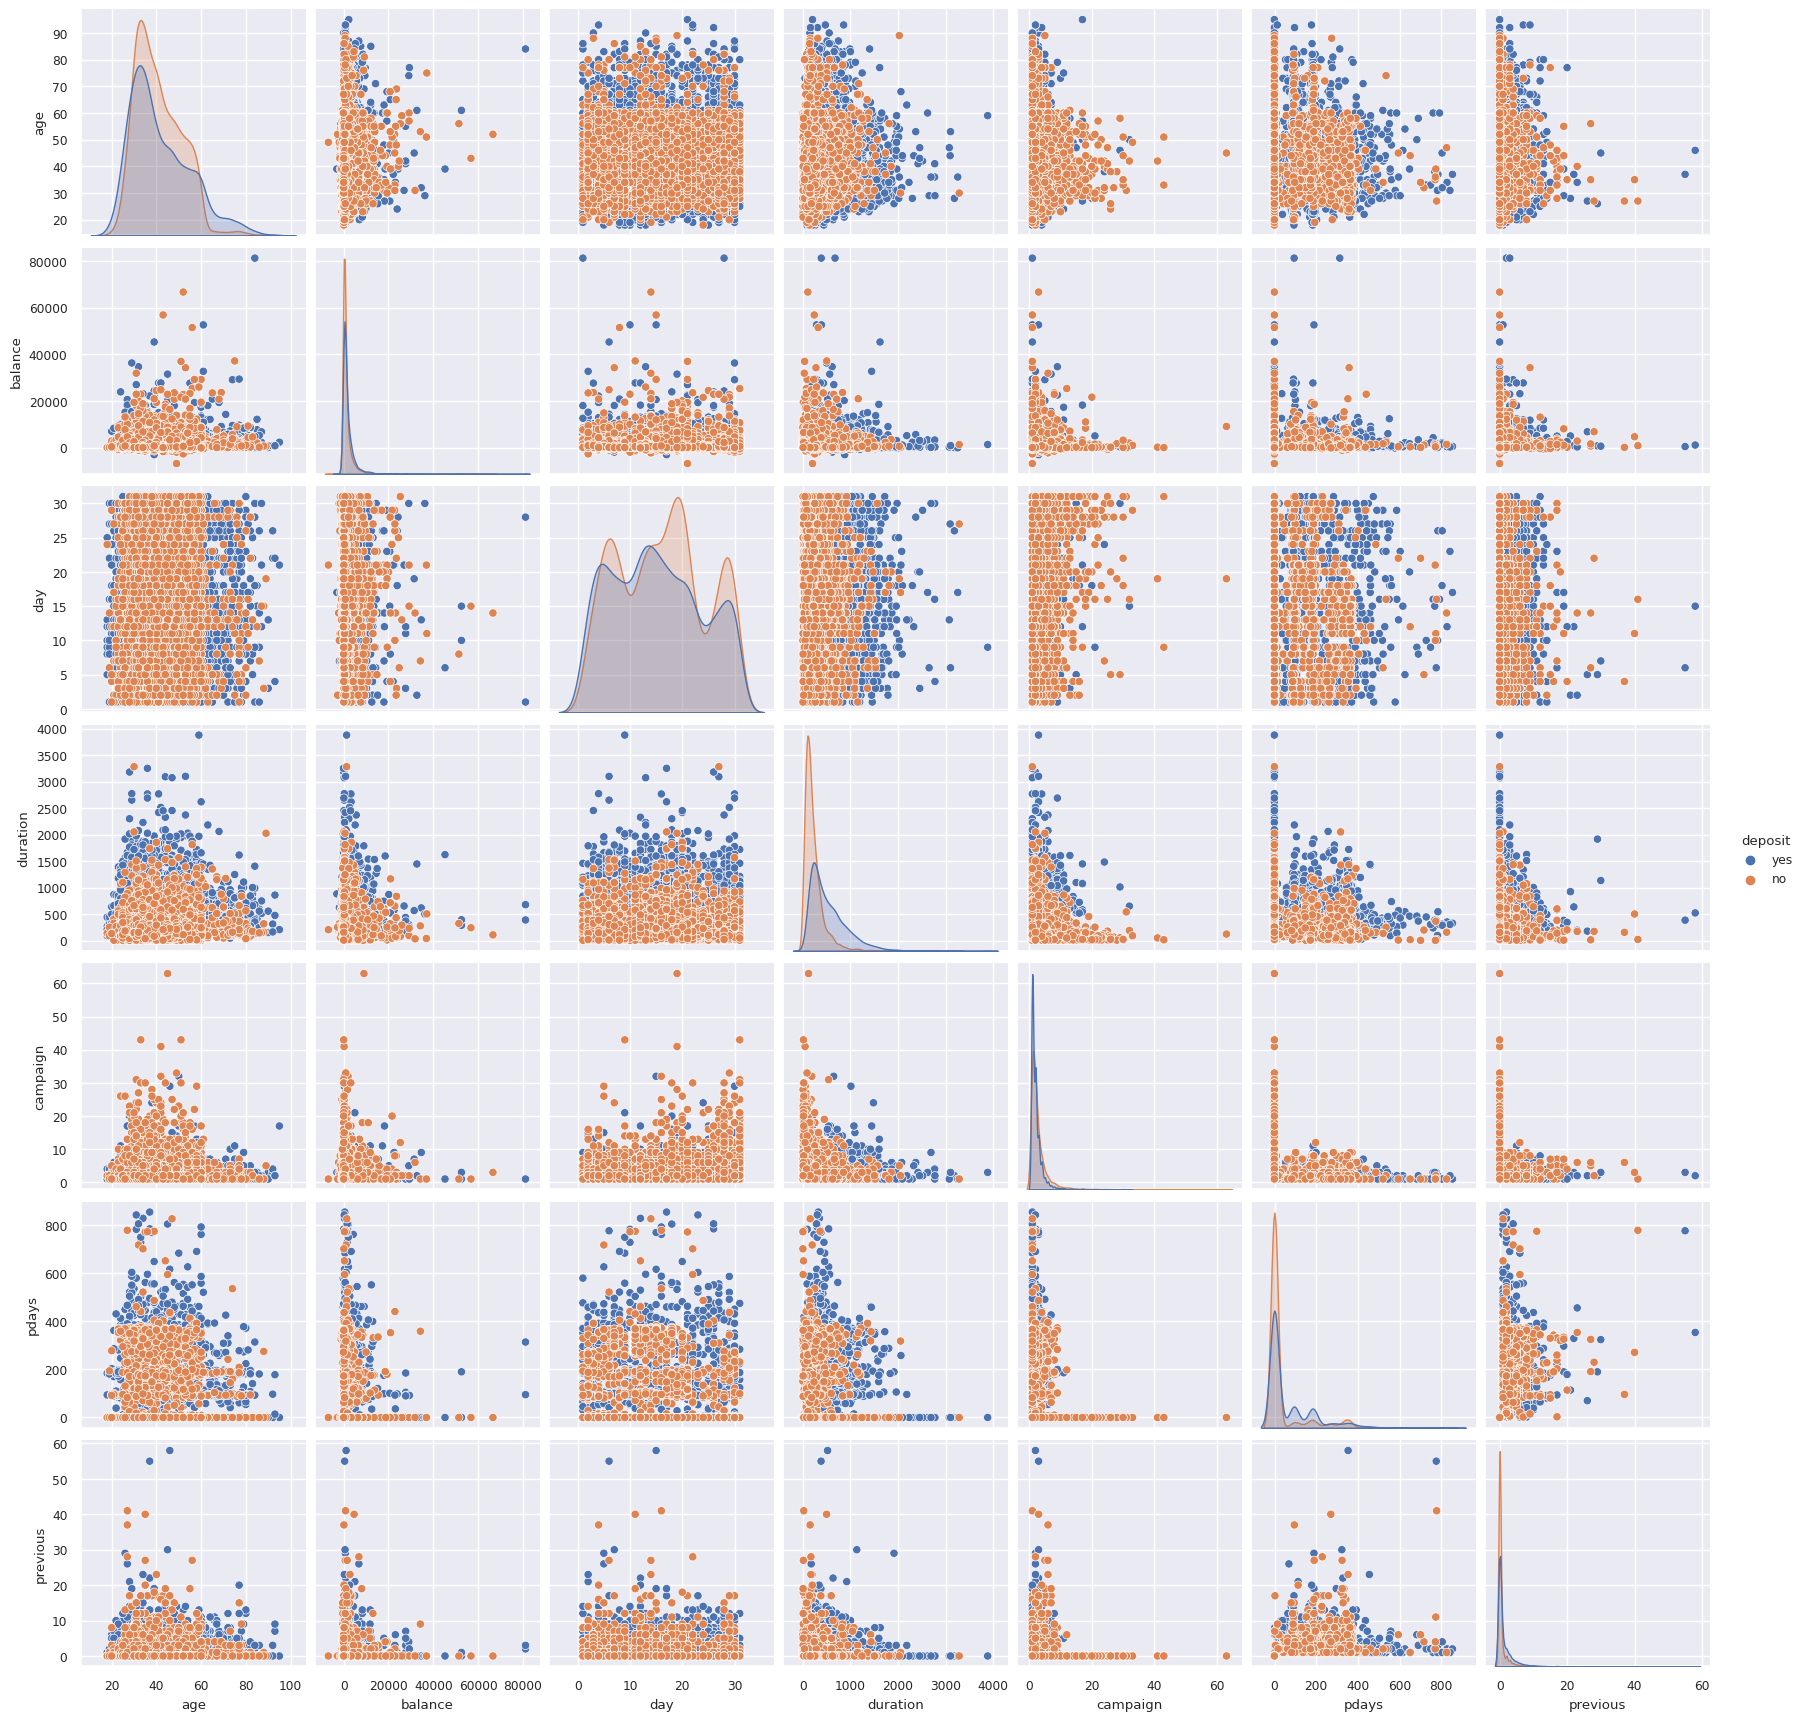

In [25]:
sns.pairplot(df[df.columns[:17]], hue='deposit')